# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline


In [27]:
Data = pd.read_csv("Classified Data")
data = np.array(Data)
#data = Data.str.split(",",expand = True)
print(data)

[[0.00000000e+00 9.13917327e-01 1.16207271e+00 ... 8.79422091e-01
  1.23140944e+00 1.00000000e+00]
 [1.00000000e+00 6.35631904e-01 1.00372163e+00 ... 6.21552215e-01
  1.49270160e+00 0.00000000e+00]
 [2.00000000e+00 7.21359808e-01 1.20149262e+00 ... 9.57877023e-01
  1.28559679e+00 0.00000000e+00]
 ...
 [9.97000000e+02 1.13546983e+00 9.82462329e-01 ... 9.19191428e-01
  1.38550400e+00 1.00000000e+00]
 [9.98000000e+02 1.08489449e+00 8.61769167e-01 ... 1.27745578e+00
  1.18806277e+00 1.00000000e+00]
 [9.99000000e+02 8.37459538e-01 9.61183523e-01 ... 1.25718998e+00
  1.36483726e+00 1.00000000e+00]]


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [32]:
scaler = preprocessing.StandardScaler().fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)


**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [31]:
scaler.fit(Data.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(Data.drop('TARGET CLASS',axis=1))
print(scaled_features)

[[-1.73031962 -0.12354188  0.18590747 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.72685552 -1.08483602 -0.43034845 ... -0.20224031 -1.82805088
   0.63675862]
 [-1.72339142 -0.78870217  0.33931821 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 1.72339142  0.64177714 -0.51308341 ... -2.36249443 -0.81426092
   0.11159651]
 [ 1.72685552  0.46707241 -0.98278576 ... -0.03677699  0.40602453
  -0.85567   ]
 [ 1.73031962 -0.38765353 -0.59589427 ... -0.56778932  0.3369971
   0.01034996]]


In [35]:
df_feat = pd.DataFrame(scaled_features,columns=Data.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [47]:
from sklearn.model_selection import train_test_split
X = df_feat
y = Data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,Data['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [64]:
pred = knn.predict(X_test)

545    0
298    0
109    0
837    0
194    0
      ..
560    1
763    1
572    0
475    0
160    0
Name: TARGET CLASS, Length: 500, dtype: int64
[0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0

### Evaluation of classification quality using Confusion Matrix

In [63]:
cm= confusion_matrix(y_test,pred)

***Print Misclassification error rate***

In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       250
           1       0.93      0.90      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [83]:
#10 folds,10 iterstions for same k value
#scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#print(scores.mean())
k_range=range(1,20)
k_scores=[]
for k in k_range:
    Knn=KNeighborsClassifier(n_neighbors=k)
    Scores = cross_val_score(Knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(1- Scores.mean())
print(k_scores)

[0.10799999999999998, 0.10400000000000009, 0.08500000000000019, 0.08099999999999985, 0.08399999999999996, 0.07300000000000006, 0.07099999999999995, 0.061999999999999944, 0.06499999999999984, 0.06600000000000006, 0.06799999999999995, 0.06299999999999994, 0.06699999999999995, 0.06899999999999995, 0.06699999999999995, 0.06699999999999995, 0.06500000000000006, 0.06500000000000006, 0.06499999999999984]


Text(0, 0.5, 'error rates ')

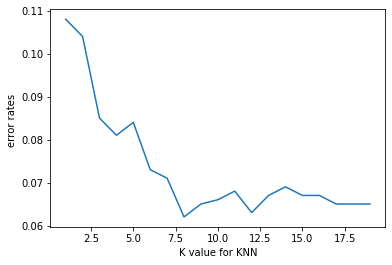

In [84]:
plt.plot(k_range, k_scores)
plt.xlabel('K value for KNN')
plt.ylabel('error rates ')